In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn  as sns
%matplotlib inline

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, delim_whitespace=True, skiprows=22, header=None)
data = np.hstack((raw_df.iloc[::2, :].values, raw_df.iloc[1::2, :2].values))
target = raw_df.iloc[1::2, 2].values
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

In [3]:
data[:2]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [4]:
print(data.shape)
data_df= pd.DataFrame(data,columns=features) 
data_df['Price']=target

(506, 13)


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#there is no missing value 

In [8]:
data_df.isna().any()


CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
Price      False
dtype: bool

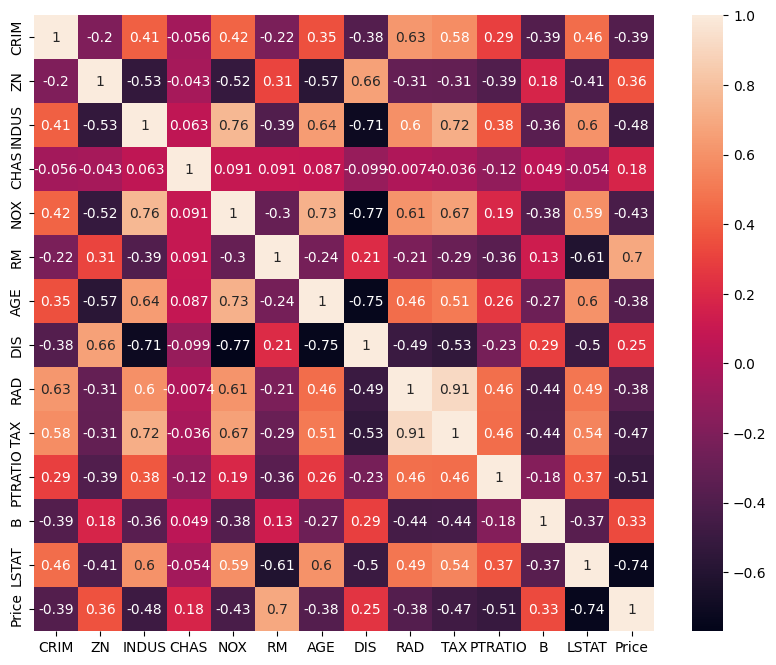

In [9]:
plt.figure(figsize=(10, 8))  # Adjust the size as needed
heatmap=sns.heatmap(data_df.corr(),annot=True);
plt.show()

We check the correlation between the price and other feature 
If there is two strongly correlated ( positively 1 or negatively -1 ) feature we can drop one of them 

In [10]:
# sns.pairplot(data_df)

<Axes: xlabel='RM', ylabel='Price'>

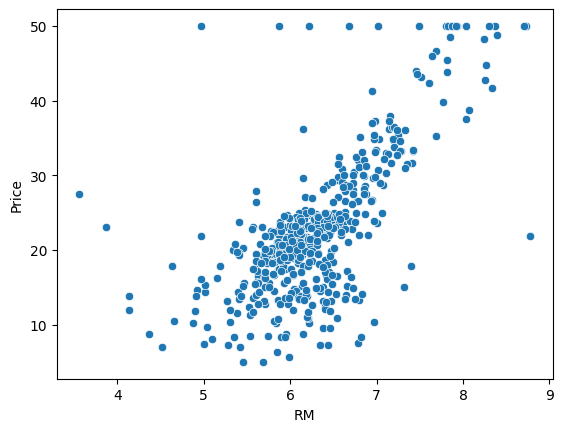

In [11]:
sns.scatterplot( x = "RM", 
                 y = "Price", 
                 data = data_df, 
                 )


<Axes: xlabel='CRIM', ylabel='Price'>

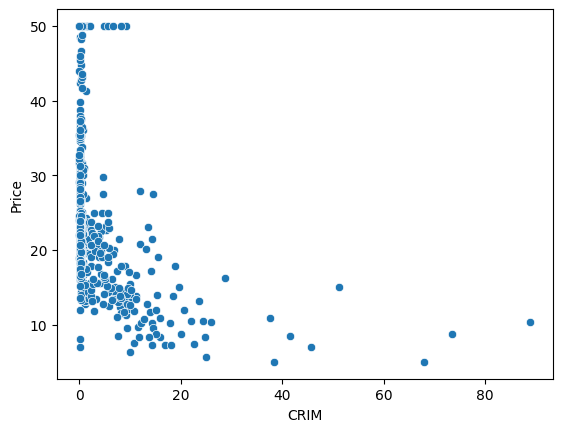

In [12]:
sns.scatterplot( x = "CRIM", 
                 y = "Price", 
                 data = data_df, 
                 )


<Axes: xlabel='RM', ylabel='Price'>

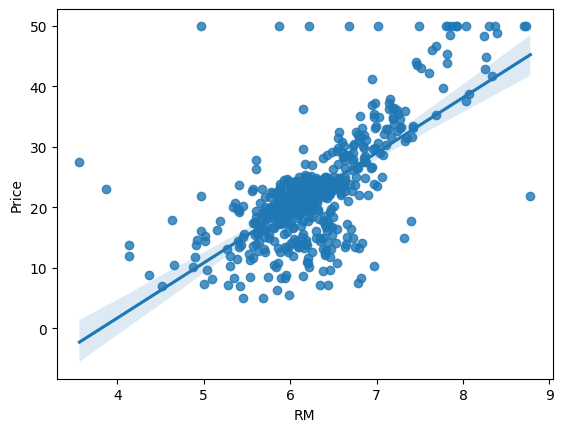

In [13]:
sns.regplot(x = "RM", 
            y = "Price", 
            data = data_df)

<Axes: xlabel='LSTAT', ylabel='Price'>

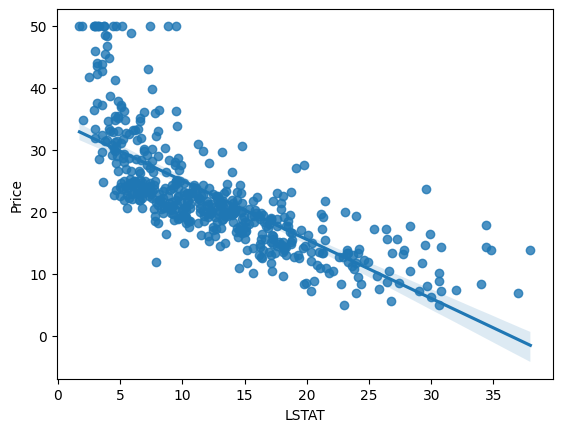

In [14]:
sns.regplot(x = "LSTAT", 
            y = "Price", 
            data = data_df)

In [15]:
X=data_df.iloc[:,:-1]
y=data_df.iloc[:,-1]


In [16]:
y.head

<bound method NDFrame.head of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64>

In [17]:
#Split data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [19]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [20]:
regression.fit(X_train,y_train)

LinearRegression()

In [21]:
type(X_train)

numpy.ndarray

In [22]:
reg_pred=regression.predict(X_test)
reg_pred


array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

<Axes: ylabel='Price'>

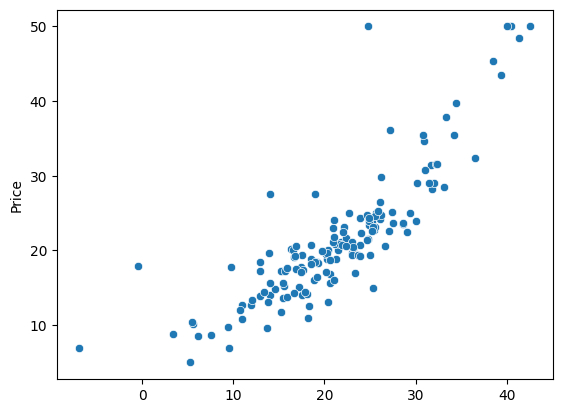

In [23]:
#compare the predicted to actual velues :
sns.scatterplot(x=reg_pred
,y=y_test)

In [24]:
## Residuals
residuals=y_test-reg_pred


In [25]:
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: Price, Length: 152, dtype: float64

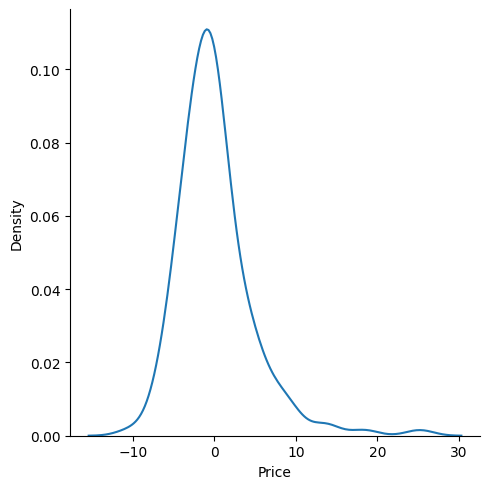

In [26]:
## Plot this residuals 
sns.displot(residuals,kind="kde")


In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))


3.1627098714574053
21.517444231177205
4.6386899261728205


In [28]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)


0.7112260057484934


In [29]:
# adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


0.6840226584639312

Data Prediction

In [30]:
new_data=data[0].reshape(1,-1)
new_data

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [31]:
#normalization
scaler.transform(data[0].reshape(1,-1))

C:\Users\USER\Desktop\Projects\MLHousePricePrediction\my_env\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [34]:
regression.predict(scaler.transform(data[0].reshape(1,-1)))

C:\Users\USER\Desktop\Projects\MLHousePricePrediction\my_env\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

**Deployement

In [36]:

import pickle
pickle.dump(regression,open('regmodel.pkl','wb'))


In [37]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))


In [39]:
## Prediction
pickled_model.predict(scaler.transform(data[0].reshape(1,-1)))


C:\Users\USER\Desktop\Projects\MLHousePricePrediction\my_env\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])